In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as geopd
import networkx as nx
import os

from matplotlib import rc, cm
viridis = cm.get_cmap('viridis')
magma   = cm.get_cmap('magma')
plasma  = cm.get_cmap('plasma')
YlOrRd  = cm.get_cmap('YlOrRd')

from pyproj import Proj, transform

import autotrail as AT
import process_gpx_data as gpx_process

import week2_demo_plots as w2p

m_in_mi = 1609.34
m_in_ft = 0.3048

# Load the Pickled Trail Data

In [2]:
#
# load the pickled traip map
#
outname = './data/boulder_area_trail_processed'
new_df, nodes, edges = gpx_process.load_trail_df(outname)
TrailMap             = gpx_process.load_graph(outname)
TrailMap.ensure_edge_attributes()
TrailMap.debug = False
for k in TrailMap.edge_attributes:
    if not (k in TrailMap._weight_factors.keys()):
        TrailMap._weight_factors[k] = 0.0

# First lets plot the map to see where we'll be starting the trail from

/home/aemerick/anaconda3/envs/planit/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/aemerick/anaconda3/envs/planit/lib/python3.7/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/home/aemerick/anaconda3/envs/planit/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is 

<IPython.core.display.Javascript object>


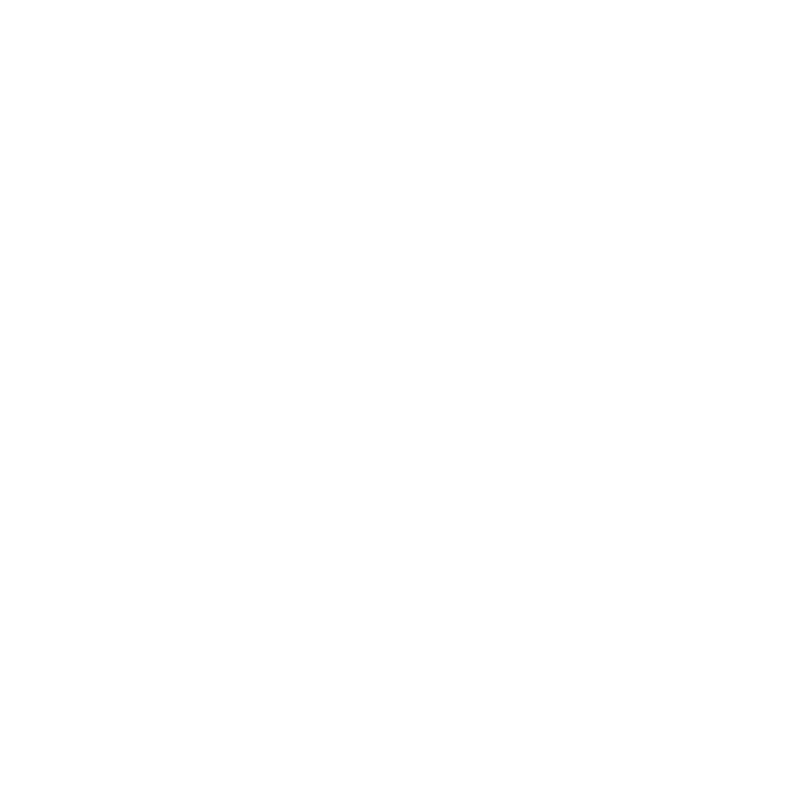

/home/aemerick/code/autotrail/autotrail/week2_demo_plots.py:33: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  ctx.add_basemap(pc, source = ctx.tile_providers.OSM_A, zoom=12)


In [3]:
# this is a trail head (roughly) 
# in Chautauqua (near the Flatirons:)
#
# this will be something user can click on on the map:
start_coord = (-105.27818, 39.99855)
w2p.plot_first(new_df, start_coord)

### Now lets set up an initial constraint problem and optimize

In [11]:
#
#
# Currently, code operates in metric (meters and km)
# but this will change 
#
#

# find the node properties for the test coordinates
node_index, node_id = TrailMap.nearest_node(*start_coord)

dist          = 20.0E3  # m
elev          = 1500.0   # meters

start_node    = node_id[0]

#
# dictionary of objectives and their target values
#
target_values = {'distance'       : dist,
                 'elevation_gain' : elev}

# find a selection of routes and return the best 3
totals, possible_routes, scores = TrailMap.multi_find_route(start_node, 
                                                            target_values, 
                                                            end_node = start_node,
                                                            n_routes=5, 
                                                            iterations=20)


In [12]:
print("Total Distances (in km).  Target Distance = %.2f km"%(target_values['distance']/1000.0))
%matplotlib inline
for i,x in enumerate(totals):
    print("%.2f"%(x['distance']/1000.0))
    pc,ax = w2p.plot_route(TrailMap, node_order=possible_routes[i], center = start_coord) 
    pc.figure.savefig("./test_images/test_%i.png"%(i))
    plt.close()

Total Distances (in km).  Target Distance = 20.00 km
15.26
13.77
13.49
12.06
10.95


/home/aemerick/anaconda3/envs/planit/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


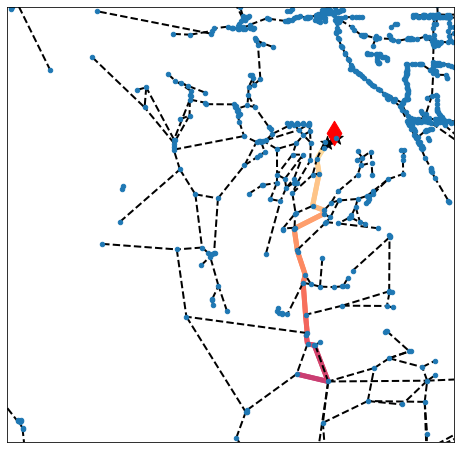

In [13]:
pc,ax = w2p.plot_route(TrailMap, node_order=possible_routes[0], center = start_coord)
pc.figure.show()

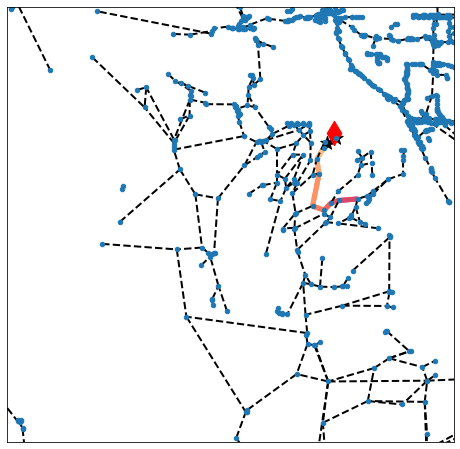

In [7]:
pc,ax = w2p.plot_route(TrailMap, node_order=possible_routes[1], center = start_coord)

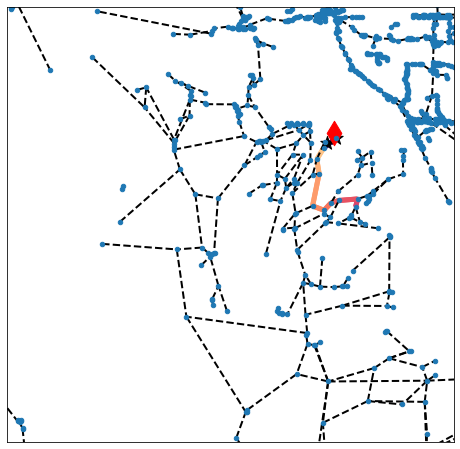

In [8]:
pc,ax = w2p.plot_route(TrailMap, node_order=possible_routes[2], center = start_coord)

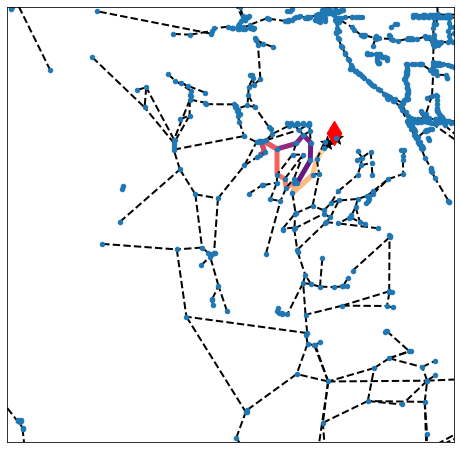

In [9]:
pc,ax = w2p.plot_route(TrailMap, node_order=possible_routes[3], center = start_coord)

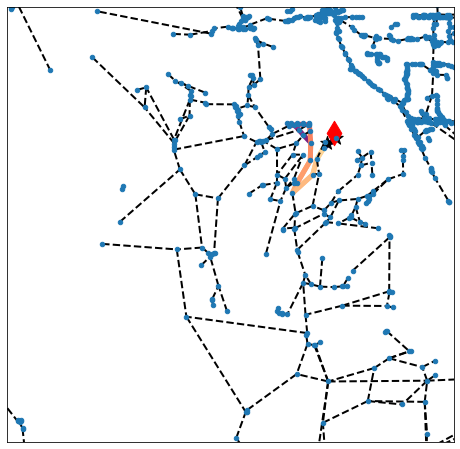

In [10]:
pc,ax = w2p.plot_route(TrailMap, node_order=possible_routes[4], center = start_coord)